<img src="https://heig-vd.ch/docs/default-source/doc-global-newsletter/2020-slim.svg" alt="Logo HEIG-VD" style="width: 80px;" align="right"/>

# Course GML - CRAPAUDUC Project

In [20]:
from datetime import datetime as dt

import matplotlib.pyplot as plt
import pandas            as pd
import seaborn           as sns

## Data importation

In [3]:
# Import labels file of a chosen camera
df_labels = pd.read_csv('data/labels_count/labels_Caméra01.csv')
df_labels.head()

,timestamp,crapaud,grenouille,triton
0,1.489003e+09,0.0,0.0,0.0
1,1.489003e+09,0.0,0.0,0.0
2,1.489003e+09,0.0,0.0,0.0
3,1.489003e+09,0.0,0.0,0.0
4,1.489003e+09,0.0,0.0,0.0


## Data preparation

In [4]:
# Transform timestamp (1489002529) in datetime (2017-03-08 20:48:49) 
df_labels['dateheure'] = [dt.fromtimestamp(x) for x in df_labels['timestamp']]

# Drop the timestamp column as we won't need it anymore
df_labels = df_labels.drop(columns=['timestamp'])

In [5]:
# Split datetime into date and time
df_labels['date']  = [d.date() for d in df_labels['dateheure']]
df_labels['heure'] = [d.time() for d in df_labels['dateheure']]

In [6]:
# Reorder dataframe for estethic display purpose
df_labels = df_labels[['date', 'heure', 'crapaud', 'grenouille', 'triton']]

In [7]:
# Display of resulting dataframe
df_labels.head()

,date,heure,crapaud,grenouille,triton
0,2017-03-08,20:48:49,0.0,0.0,0.0
1,2017-03-08,20:48:50,0.0,0.0,0.0
2,2017-03-08,20:48:51,0.0,0.0,0.0
3,2017-03-08,20:48:52,0.0,0.0,0.0
4,2017-03-08,20:48:53,0.0,0.0,0.0


## Exploratory analysis

### Counts and relative percentage of quantity observed, for each label

In [8]:
def counts_and_percentage_in_df(df, feature):
    print('Count :\n', df[feature].value_counts(), '\n')
    print('Percentage :\n', round(df[feature].value_counts(normalize=True)*100,2), '\n')
    
    print('Relative frequency (y-axis) of number of `' + feature + '` (x-axis) observed in data set')
    df[feature].value_counts(normalize=True).plot(kind='bar')

Count :
 0.0    14337
Name: crapaud, dtype: int64 

Percentage :
 0.0    100.0
Name: crapaud, dtype: float64 

Relative frequency (y-axis) of number of `crapaud` (x-axis) observed in data set


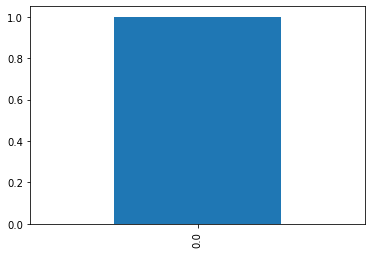

In [9]:
counts_and_percentage_in_df(df_labels, 'crapaud')

Count :
 0.0    14124
1.0      167
2.0       40
3.0        6
Name: grenouille, dtype: int64 

Percentage :
 0.0    98.51
1.0     1.16
2.0     0.28
3.0     0.04
Name: grenouille, dtype: float64 

Relative frequency (y-axis) of number of `grenouille` (x-axis) observed in data set


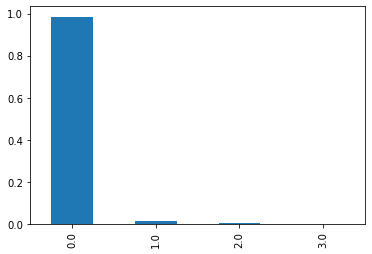

In [10]:
counts_and_percentage_in_df(df_labels, 'grenouille')

Count :
 0.0    14237
1.0      100
Name: triton, dtype: int64 

Percentage :
 0.0    99.3
1.0     0.7
Name: triton, dtype: float64 

Relative frequency (y-axis) of number of `triton` (x-axis) observed in data set


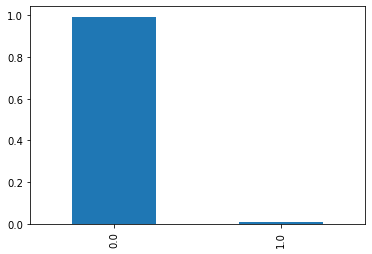

In [11]:
counts_and_percentage_in_df(df_labels, 'triton')

### Number of observation per date, for each label

In [12]:
def scatter_date_per_feature(df, feature):
    plt.figure(figsize=(15,3))
    plt.ylim([-0.5,5])
    plt.scatter(df['date'], df[feature])
    plt.xlabel('date')
    plt.ylabel('nombre de ' + feature)
    plt.grid()

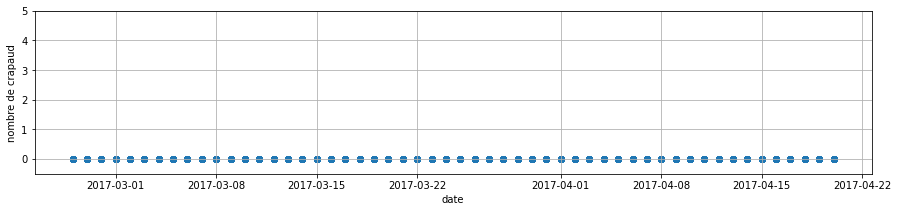

In [13]:
scatter_date_per_feature(df_labels, 'crapaud')

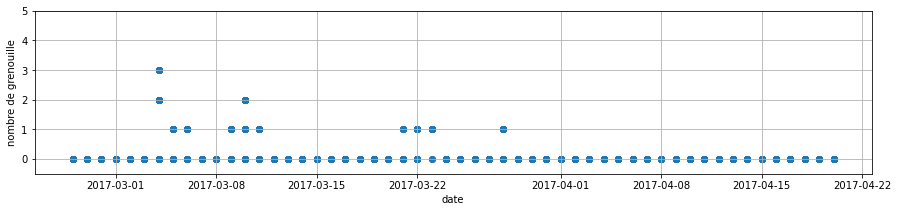

In [14]:
scatter_date_per_feature(df_labels, 'grenouille')

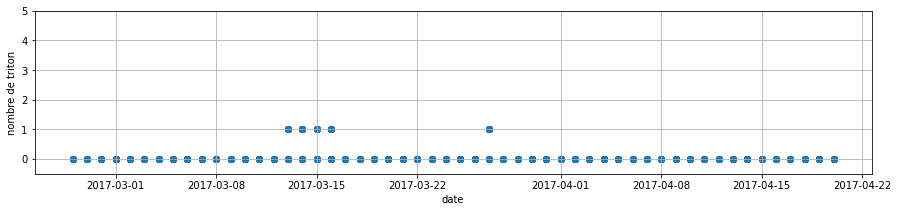

In [15]:
scatter_date_per_feature(df_labels, 'triton')

### Labels observed (date - time - number of observation)

In [16]:
# Creation of a dataframe containing only the samples where one of the labels' value is not zero
df_activated_label = df_labels.loc[(df_labels['crapaud'] != 0)    |
                                   (df_labels['grenouille'] != 0) |
                                   (df_labels['triton'] != 0)]

In [17]:
# Size of new dataframe 
# = number of samples in given dataset where we observed at least one of the labels
df_activated_label.shape

(313, 5)

In [18]:
# in progress ...

df_activated_label.groupby([df_activated_label['dateheure'].dt.hour])
df_activated_label

KeyError: 'dateheure'

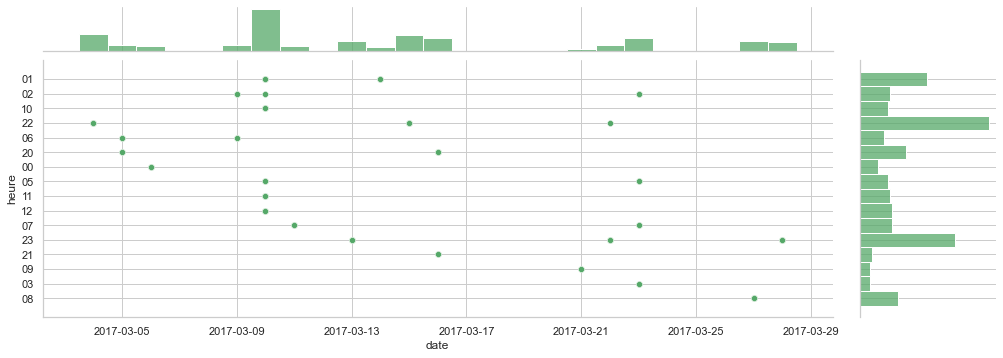

In [40]:
# Regroupement des données par heure d'observation { [00:00:00, 01:00:00[ , ... , [23:00:00, 00:00:00[ }
y = [k.strftime('%H') for k in df_activated_label['heure']]

sns.set_style("whitegrid")
plot = sns.jointplot(data=df_activated_label, x ='date',color="g", y=y)
plot.set_axis_labels('date', 'heure')
plot.fig.set_figwidth(15)
plot.fig.set_figheight(5)

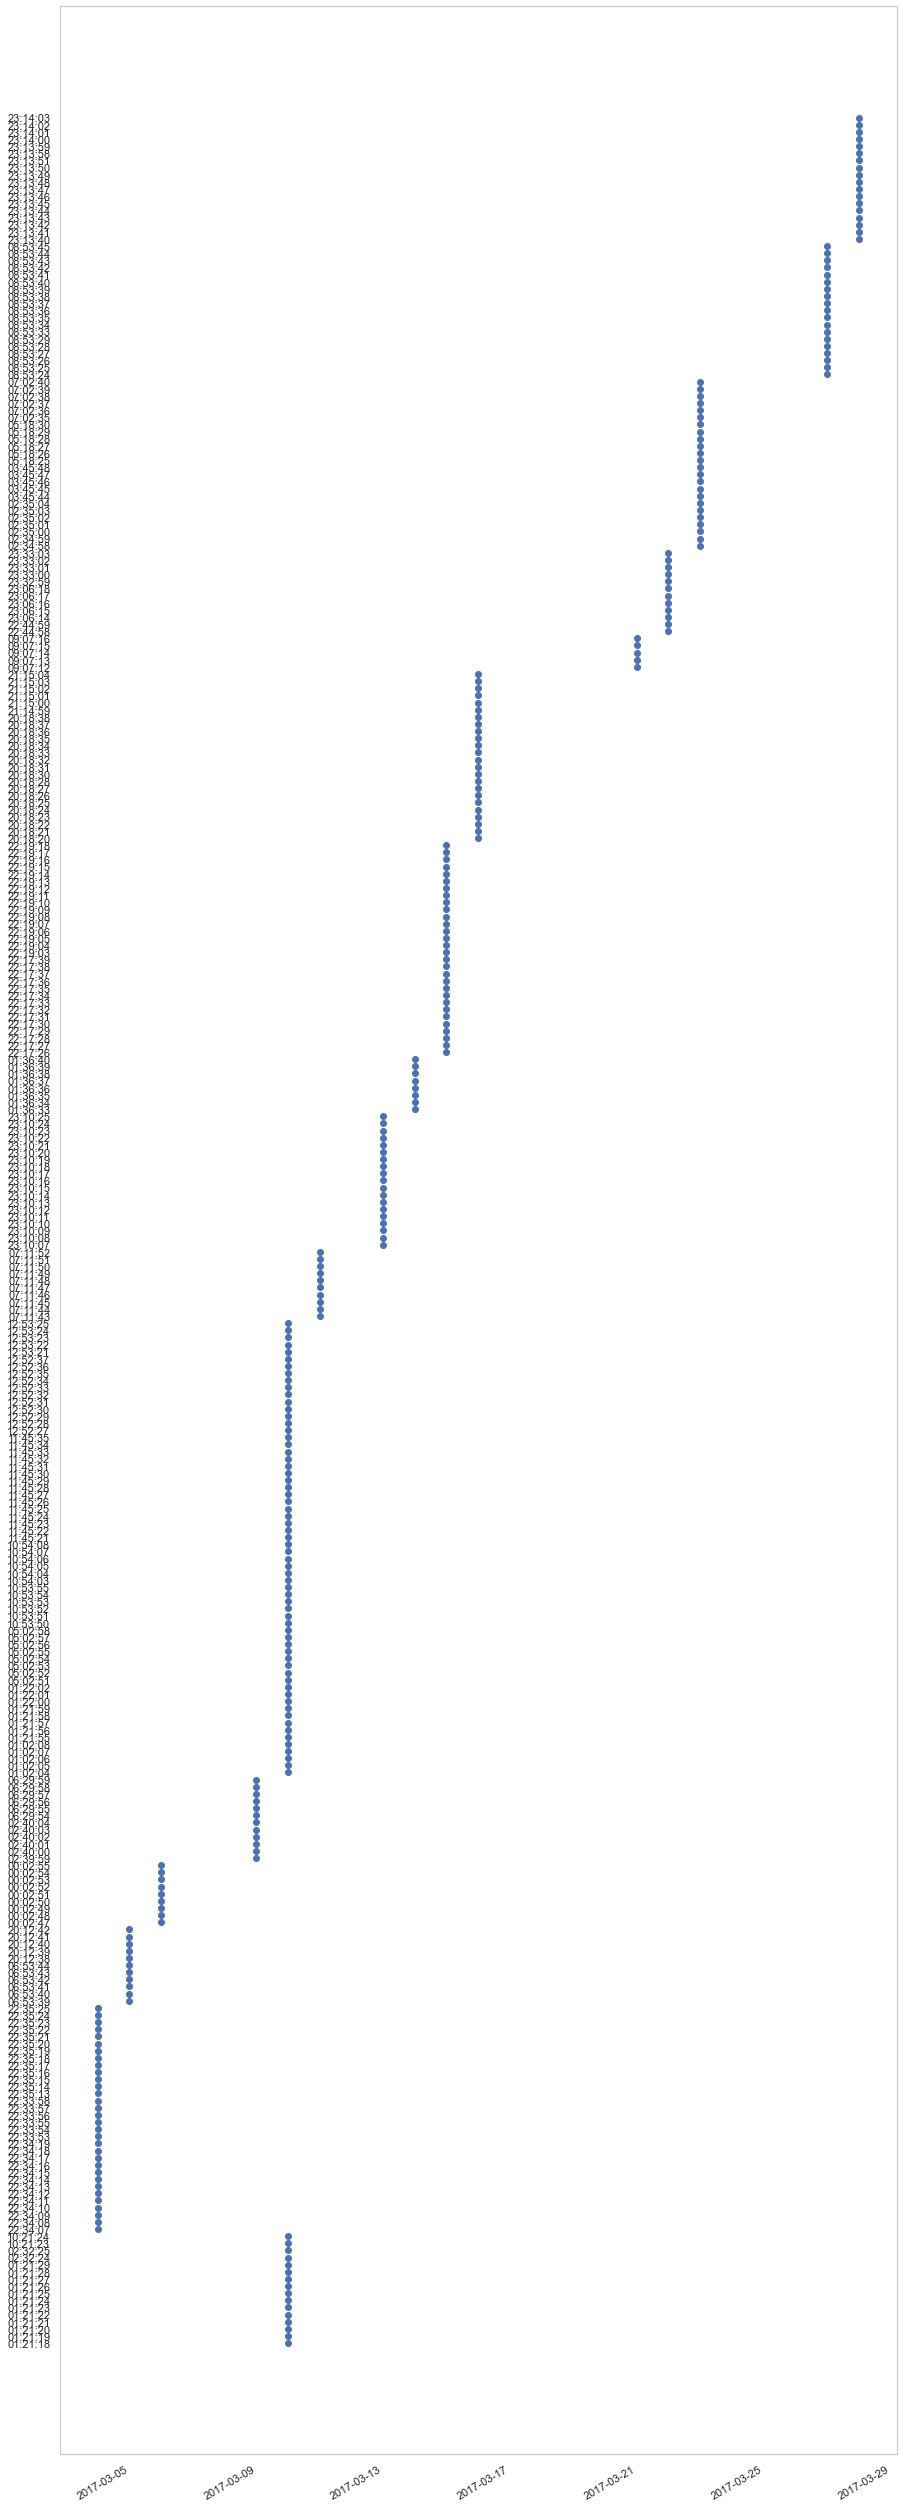

In [41]:
import numpy as np

x = [k.strftime('%m %d %Y') for k in df_activated_label['date']]
y = [k.strftime('%H:%M:%S') for k in df_activated_label['heure']]

fig, ax = plt.subplots(figsize=(15,50))


ax.plot(df_activated_label.date, y, 'o')

# Optional. Just rotates x-ticklabels in this case.
fig.autofmt_xdate()
plt.grid()
plt.show()

Regrouper les données par heure : 
- ébauche de groupby : https://codenostra.com/fr/comment-regrouper-les-dataframes-par-heure-en-utilisant-lhorodatage-avec-pandas.html
